# T4 FOXSI2 - Quiet Sun Analysis for D6
## November 2020
## Milo BC - Berkeley

## LOAD AND PLOT RAYS

In [1]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap 
import numpy as np
import astropy.io.fits as pyfits
from glob import glob
import sunpy.coordinates
import datetime

# Parameters
Dir = './D6_rays/'
Dang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
T4x, T4y = 200, 750    # Target center
sim_scale = 1031.328   # 1cm = 1031.328 arcsec
#sim_scale = 17.18880   # 1cm = 17.4 arcmin
Xmask, Ymask = -240, 360
Rmask = 700
Rsun  = sunpy.coordinates.sun.angular_radius(datetime.datetime(2014,12,11,19,11)).value \
        * (1 + 100/695700) # This is equivalent to chose a buffer of 100km over the solar photosphere.        

def readrays(file):
    # load rays
    Rays = load_rays(file)
    # fix a small bug
    for r in Rays:
        r.hist = r.hist.tolist()
    # Create detector :
    detector = Detector(width=40,
                        height=40,
                        normal = [0,0,1],
                        center = [0,0,230], # f-distance + segment lenght
                        reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Rays)
    # Select D, H, and P rays
    Drays = [r for r in Rays if (r.des[2]==230 and r.bounces ==2 )]
    Srays = [r for r in Rays if (r.des[2]==230 and r.bounces ==1 )]
    Hrays = [r for r in Rays if (r.des[2]==230 and r.bounces ==1 and r.tag[-4:] == 'Hy-D' )]
    Prays = [r for r in Rays if (r.des[2]==230 and r.bounces ==1 and r.tag[-4:] == 'Pa-D' )]
    # Define initial void lists to store rays to return
    All_Hx, All_Hy, All_Px, All_Py, All_Dx, All_Dy = [], [], [], [], [], []    
    #Hyperboloid
    Hx, Hy = [], []
    for r in Hrays:
        Hx.append(r.pos[0]*sim_scale + T4x)
        Hy.append(r.pos[1]*sim_scale + T4y)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
    # Paraboloid
    Px, Py = [], []
    for r in Prays:
        Px.append(r.pos[0]*sim_scale + T4x)
        Py.append(r.pos[1]*sim_scale + T4y)
    All_Px.append(Px)
    All_Py.append(Py)
    # Double
    Dx, Dy = [], []
    for r in Drays:
        Dx.append(r.pos[0]*sim_scale + T4x)
        Dy.append(r.pos[1]*sim_scale + T4y)
    All_Dx.append(Dx)
    All_Dy.append(Dy)
    
    return All_Hx, All_Hy, All_Px, All_Py, All_Dx, All_Dy

Rays from ./D6_rays/D6_S1.csv loaded.
reading ./D6_rays/D6_S1.csv
Rays from ./D6_rays/D6_S2.csv loaded.
reading ./D6_rays/D6_S2.csv
Rays from ./D6_rays/D6_S3.csv loaded.
reading ./D6_rays/D6_S3.csv
Rays from ./D6_rays/D6_S4.csv loaded.
reading ./D6_rays/D6_S4.csv
Rays from ./D6_rays/D6_S5.csv loaded.
reading ./D6_rays/D6_S5.csv


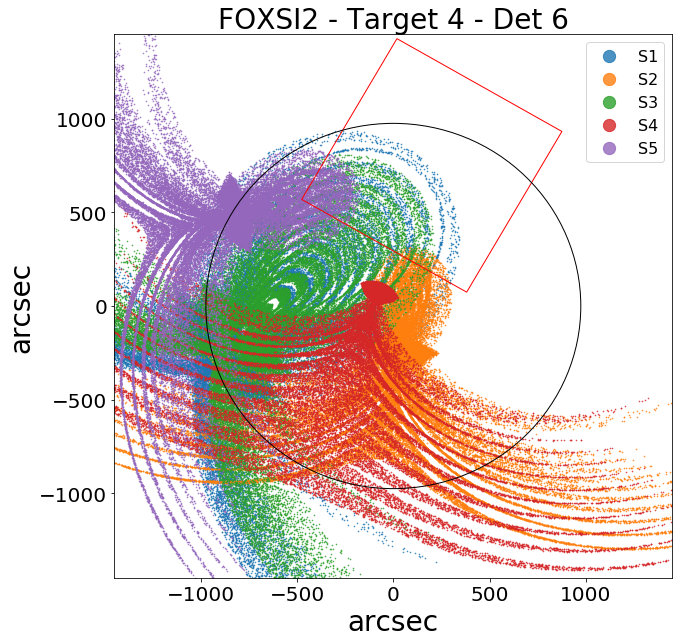

In [3]:
# Plotting
tabcolors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
fig, ax = plt.subplots(figsize=(10,10))
# ornaments
ax.set_xlim(-1450,1450)
ax.set_ylim(-1450,1450)
ax.set_xlabel('arcsec',fontsize=28)
ax.set_ylabel('arcsec',fontsize=28)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI2 - Target 4 - Det 6',fontsize=28)
# sources:
for tc, source in zip(tabcolors, sorted(glob(Dir+'*.csv'))):
    S_Hx, S_Hy, S_Px, S_Py, S_Dx, S_Dy = readrays(source) # Read Rays
    print('reading '+source)
    ax.scatter(S_Hx,S_Hy,color=tc,s=.4,alpha=0.8,label=source[-6:-4])
    ax.scatter(S_Px,S_Py,color=tc,s=.4,alpha=0.8)
    ax.scatter(S_Dx,S_Dy,color=tc,s=.4,alpha=0.8)
# D6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[6]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[6]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
circ = patches.Circle((0,0),radius= Rsun,fill=False);ax.add_patch(circ)
# legend
lgnd = ax.legend(loc='upper right',scatterpoints=1, fontsize=16)
lgnd.legendHandles[0]._sizes = [150]
lgnd.legendHandles[1]._sizes = [150]
lgnd.legendHandles[2]._sizes = [150]
lgnd.legendHandles[3]._sizes = [150]
lgnd.legendHandles[4]._sizes = [150]
plt.show()
fig.savefig('images/D6SourcesT4.png',bbox_inches='tight',dpi=300)
plt.close(fig)

## Definign a circle to mask out ghost rays

Rays from ./D6_rays/D6_S1.csv loaded.


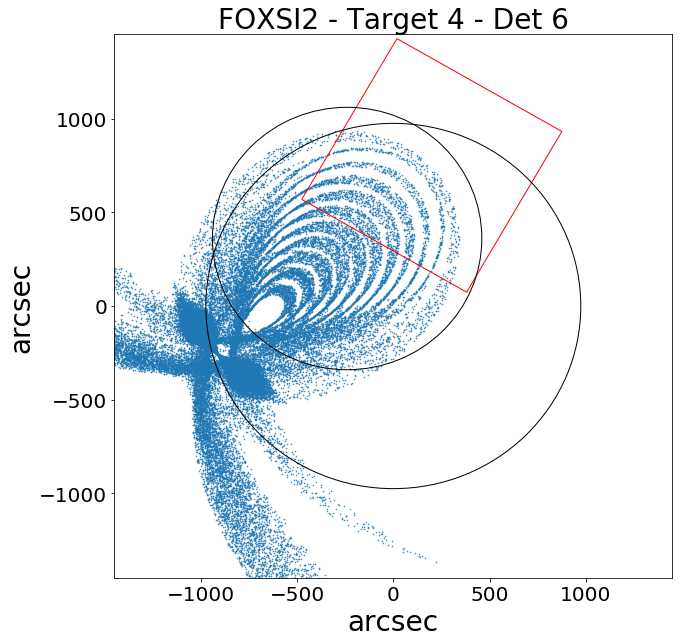

In [5]:
# Plotting
tc = 'tab:blue'
fig, ax = plt.subplots(figsize=(10,10))
# ornaments
ax.set_xlim(-1450,1450)
ax.set_ylim(-1450,1450)
ax.set_xlabel('arcsec',fontsize=28)
ax.set_ylabel('arcsec',fontsize=28)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI2 - Target 4 - Det 6',fontsize=28)
# sources:
source = Dir+'D6_S1.csv'
S_Hx, S_Hy, S_Px, S_Py, S_Dx, S_Dy = readrays(source) # Read Rays
ax.scatter(S_Hx,S_Hy,color=tc,s=.4,alpha=0.8,label=source[-6:-4])
ax.scatter(S_Px,S_Py,color=tc,s=.4,alpha=0.8)
ax.scatter(S_Dx,S_Dy,color=tc,s=.4,alpha=0.8)
# D6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[6]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[6]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
solardisk = patches.Circle((0,0),radius= Rsun,fill=False);ax.add_patch(solardisk)
circ = patches.Circle((Xmask,Ymask),radius= 700,fill=False);ax.add_patch(circ)
plt.show()
fig.savefig('images/D6SourcesT4_Mask.png',bbox_inches='tight',dpi=300)
plt.close(fig)

# Handling IDL SAV files 
### [FOXSI2 T4 D6]

In [14]:
from scipy.io import readsav
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
det = 6
DataDir = './DataFOXSI2/'
offset_xy = [360., -180.]
T4x, T4y = 200, 750
Dang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
tlaunch = 69060.
Erange = [5, 10] # maximize the amount of counts we got
#Erange = [6, 12] # to be consistent with Hannah et al. (2007, 2010)
thr_n = 4.
R10s = 700
#R10s = 600
R07s = 500

def All_Data(datafile,Erange,Trange):
    ''' return all data - Good and No Good - '''
    # Read SAV LEV2 data : 
    data_lvl2_d6 = readsav(DataDir+datafile)[datafile[:-4]]
    # Energy selection :
    data_lvl2_d6_E = data_lvl2_d6[(np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] > Erange[0]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] < Erange[1]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[0] > thr_n)]
    # Time selection :
    data_lvl2_d6_ET = data_lvl2_d6_E[(data_lvl2_d6_E['wsmr_time'] > Trange[0]) & 
                                    (data_lvl2_d6_E['wsmr_time'] < Trange[1])]
    return data_lvl2_d6_ET

def Good_Data(datafile,Erange,Trange):
    # Read SAV LEV2 data : 
    data_lvl2_d6 = readsav(DataDir+datafile)[datafile[:-4]]
    # Energy selection :
    data_lvl2_d6_E = data_lvl2_d6[(np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] > Erange[0]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] < Erange[1]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[0] > thr_n)]
    # Time selection :
    data_lvl2_d6_ET = data_lvl2_d6_E[(data_lvl2_d6_E['wsmr_time'] > Trange[0]) & 
                                    (data_lvl2_d6_E['wsmr_time'] < Trange[1])]
    # Good_Data selection :
    data_lvl2_d6_ET_noerr = data_lvl2_d6_ET[data_lvl2_d6_ET['ERROR_FLAG']==0]
    return data_lvl2_d6_ET_noerr

def plotdata(FXDX, det):
    fig, ax = plt.subplots(figsize=(10,10))
    # ornaments
    ax.set_xlim(-1450,1450)
    ax.set_ylim(-1450,1450)
    ax.set_xlabel('arcsec',fontsize=28)
    ax.set_ylabel('arcsec',fontsize=28)
    ax.tick_params(axis='both', labelsize=20)
    ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
    # FOXSI2 Data
    ax.scatter(np.stack(FXDX['HIT_XY_SOLAR']).T[0] + offset_xy[0],
               np.stack(FXDX['HIT_XY_SOLAR']).T[1]+ offset_xy[1],
               marker='o',color='black',alpha=0.4)
    # D6 - Si
    l = 990
    mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-45)) + 1)
    my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-135)) + 1)
    rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),l,l,angle=Dang[det],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    l = 943.6
    mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-45)) + 1)
    my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-135)) + 1)
    rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),l,l,angle=Dang[det],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    solardisk = patches.Circle((0,0),radius= Rsun,fill=False);ax.add_patch(solardisk)
    r = (R10s if det == 6 else R07s)
    circ = patches.Circle((Xmask,Ymask),radius= r,fill=False);ax.add_patch(circ)
    plt.show()
    fig.savefig('F2T4D'+str(det)+'S.png',bbox_inches='tight',dpi=300)
    plt.close(fig)

def plotspect(FXDX):
    es = np.stack(FXDX['hit_energy']).T[1] # get energy values
    det = FXDX['det_num'][0]
    # plot spectrum
    fig, ax = plt.subplots(figsize=(8,6))
    # ornaments
    ax.set_xlim(4,11)
    ax.set_ylim(0,1)
    ax.set_xlabel('Energy [keV]',fontsize=28)
    ax.set_yticks([])
    ax.tick_params(axis='x', labelsize=20)
    ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
    ax.axvspan(5, 10, alpha=0.2, color='grey')
    # FOXSI2 Data
    ax.scatter(es, np.ones_like(es)*.5,s=250, c='grey', marker='o',alpha=0.7)
    ax.vlines(es,ymin=0,ymax=1,color='grey',linestyles='dashed')
    plt.show()
    fig.savefig('F2T4D'+str(det)+'_Spec.pdf',bbox_inches='tight',dpi=300)
    plt.close(fig)

def plothist(FXDX):
    barwidth, emin, emax = 0.5, 5, 10
    es = np.stack(FXDX['hit_energy']).T[1] # get energy values
    y,binEdges = np.histogram(es,bins=int((emax-emin)/barwidth),range=(emin,emax))
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    menStd     = np.sqrt(y)
    det = FXDX['det_num'][0]
    # plot spectrum
    fig, ax = plt.subplots(figsize=(8,6))
    # ornaments
    ax.set_xlim(4,11)
    ax.set_xlabel('Energy [keV]',fontsize=28)
    ax.set_ylabel('Counts',fontsize=28)
    #ax.set_yticks([])
    ax.tick_params(axis='both', labelsize=20)
    ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
    ax.axvspan(emin, emax, alpha=0.2, color='grey')
    # FOXSI2 Data
    plt.bar(bincenters, y, width=barwidth, color='grey', yerr=menStd)
    plt.show()
    fig.savefig('F2T4D'+str(det)+'_Hist.pdf',bbox_inches='tight',dpi=300)
    plt.close(fig)

In [3]:
# Defining times:
t4_start = 373.5
t4_end   = 466.2
Trange6 = np.array((t4_start, t4_end)) + tlaunch

In [4]:
# Loading FOXSI2 Data - ONLY GOOD DATA - :
# 10-shell
F2D6 = Good_Data('data_lvl2_d6.sav',Erange,Trange6)

In [5]:
# Loading FOXSI2 Data - ALL DATA - :
# NEEDED only for LIFETIME estimate purposes
# 10-shell
F2D6_All = All_Data('data_lvl2_d6.sav',Erange,Trange6)

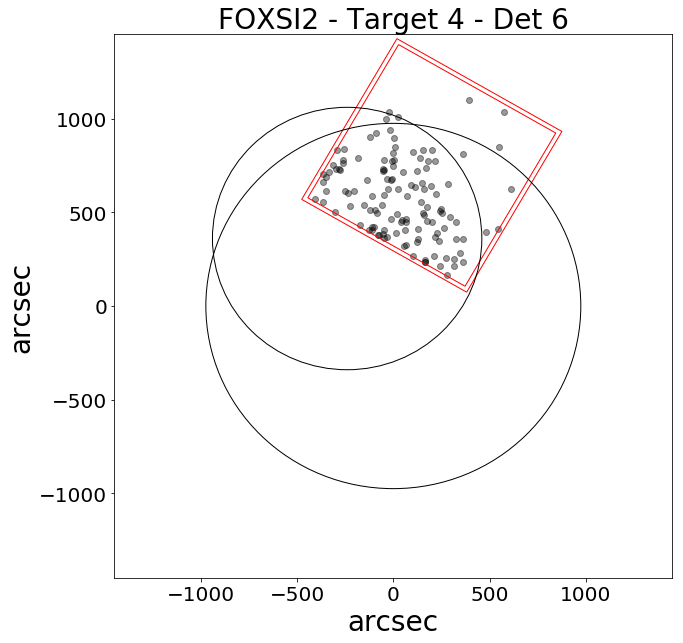

In [15]:
plotdata(F2D6,6)

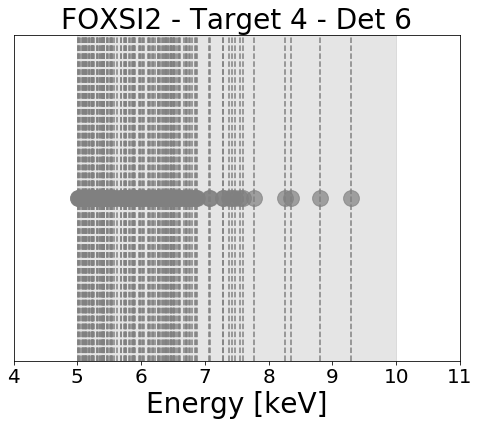

In [12]:
plotspect(F2D6)

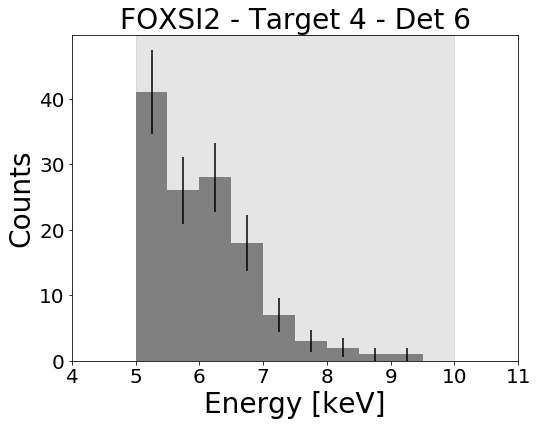

In [13]:
plothist(F2D6)

# Finding areas of interest

In [14]:
Rmask = (R10s if det == 6 else R07s)
def DetArea(det, N) :
    lsi = 990 # length of Silicon Detector in arcsec
    # create an initial meshgrid with the size of the Si det :
    Xi, Yi = np.meshgrid(np.linspace(-.5*lsi, .5*lsi, N+1), np.linspace(-.5*lsi, .5*lsi, N+1))
    # rotate and translate :
    Xrt   =  np.cos(np.deg2rad(Dang[det]))*Xi - np.sin(np.deg2rad(Dang[det]))*Yi + T4x
    Yrt   =  np.sin(np.deg2rad(Dang[det]))*Xi + np.cos(np.deg2rad(Dang[det]))*Yi + T4y
    return Xrt, Yrt

In [26]:
Det6Area = DetArea(6, 1000)

In [27]:
# Dots inside solar disk
Xin = Det6Area[0][np.sqrt(Det6Area[0]**2 + Det6Area[1]**2) < Rsun ]
Yin = Det6Area[1][np.sqrt(Det6Area[0]**2 + Det6Area[1]**2) < Rsun ]
# Dots outside the ghost rays circle
Xnogr = Xin[np.sqrt((Xin - Xmask )**2 + (Yin - Ymask)**2) > Rmask]
Ynogr = Yin[np.sqrt((Xin - Xmask )**2 + (Yin - Ymask)**2) > Rmask]
# Dots outside solar disk
Xout = Det6Area[0][(np.sqrt(Det6Area[0]**2 + Det6Area[1]**2) > Rsun) &
                   (np.sqrt((Det6Area[0] - Xmask )**2 + (Det6Area[1] - Ymask)**2) > R10s)]
Yout = Det6Area[1][(np.sqrt(Det6Area[0]**2 + Det6Area[1]**2) > Rsun) &
                   (np.sqrt((Det6Area[0] - Xmask )**2 + (Det6Area[1] - Ymask)**2) > R10s)]
# Dots inside the ghost rays circle
Xgr = Xin[np.sqrt((Xin - Xmask )**2 + (Yin - Ymask)**2) < R10s]
Ygr = Yin[np.sqrt((Xin - Xmask )**2 + (Yin - Ymask)**2) < R10s]

In [28]:
# Color code FOXSI-2 Data (GOOD) :
FX = np.stack(F2D6['HIT_XY_SOLAR']).T[0] + offset_xy[0]
FY = np.stack(F2D6['HIT_XY_SOLAR']).T[1]+ offset_xy[1]
EE = np.stack(F2D6['HIT_ENERGY']).T[1]
# FOXSI-2 Data inside solar disk
FXin = FX[(np.sqrt(FX**2 + FY**2) < Rsun) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask)]
FYin = FY[(np.sqrt(FX**2 + FY**2) < Rsun) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask)]
EEin = EE[(np.sqrt(FX**2 + FY**2) < Rsun) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask)]
# FOXSI-2 Data outside solar disk
FXout = FX[(np.sqrt(FX**2 + FY**2) > Rsun) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask)]
FYout = FY[(np.sqrt(FX**2 + FY**2) > Rsun) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask)]
EEout = EE[(np.sqrt(FX**2 + FY**2) > Rsun) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask)]
# FOXSI-2 Data inside Ghost Ray disk
FXgr = FX[(np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) < Rmask)]
FYgr = FY[(np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) < Rmask)]
EEgr = EE[(np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) < Rmask)]

#### Lifetime estimates

In [29]:
# Color code FOXSI-2 Data (ALL) :
FX_All = np.stack(F2D6_All['HIT_XY_SOLAR']).T[0] + offset_xy[0]
FY_All = np.stack(F2D6_All['HIT_XY_SOLAR']).T[1]+ offset_xy[1]
# FOXSI-2 Data inside solar disk
FXin_All = FX_All[(np.sqrt(FX_All**2 + FY_All**2) < Rsun) &
          (np.sqrt((FX_All - Xmask )**2 + (FY_All - Ymask)**2) > Rmask)]
FYin_All = FY_All[(np.sqrt(FX_All**2 + FY_All**2) < Rsun) &
          (np.sqrt((FX_All - Xmask )**2 + (FY_All - Ymask)**2) > Rmask)]
# FOXSI-2 Data outside solar disk
FXout_All = FX_All[(np.sqrt(FX_All**2 + FY_All**2) > Rsun) &
          (np.sqrt((FX_All - Xmask )**2 + (FY_All - Ymask)**2) > Rmask)]
FYout_All = FY_All[(np.sqrt(FX_All**2 + FY_All**2) > Rsun) &
          (np.sqrt((FX_All - Xmask )**2 + (FY_All - Ymask)**2) > Rmask)]
print('Lifetime inside = {0}/{1} = {2} [green]'.format(FXin.size,FXin_All.size,round(FXin.size/FXin_All.size,3)))
print('Lifetime outside = {0}/{1} = {2} [blue]'.format(FXout.size,FXout_All.size,round(FXout.size/FXout_All.size,3)))

Lifetime inside = 4/24 = 0.167 [green]
Lifetime outside = 4/10 = 0.4 [blue]


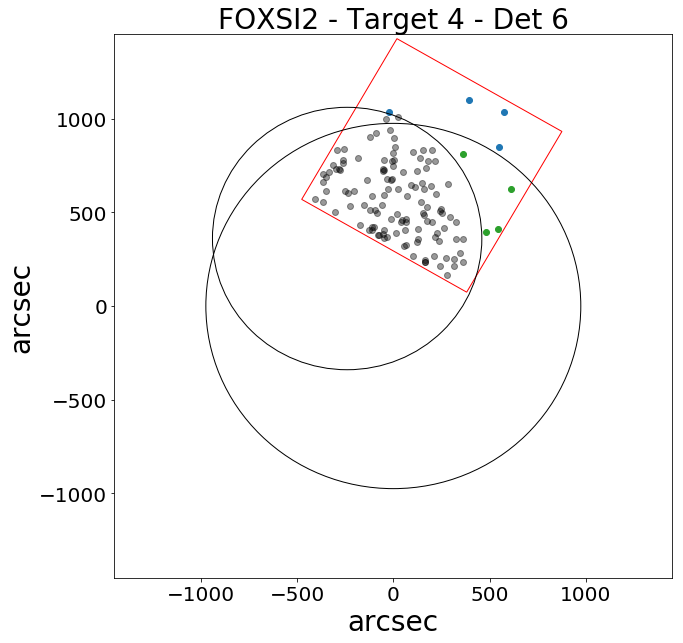

In [25]:
# Plotting
det = 6
fig, ax = plt.subplots(figsize=(10,10))
# ornaments
ax.set_xlim(-1450,1450)
ax.set_ylim(-1450,1450)
ax.set_xlabel('arcsec',fontsize=28)
ax.set_ylabel('arcsec',fontsize=28)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
# Detector Area
# plt.scatter(Det6Area[0], Det6Area[1],marker='.',color='tab:grey')
# plt.scatter(Xnogr, Ynogr, marker='.',color='tab:green')
# plt.scatter(Xout, Yout, marker='.',color='tab:blue')
# plt.scatter(Xgr, Ygr, marker='.',color='tab:grey')
# FOXSI2 Data
ax.scatter(FXin,FYin,marker='o',color='tab:green',alpha=1.0)
ax.scatter(FXout,FYout,marker='o',color='tab:blue',alpha=1.)
ax.scatter(FXgr,FYgr,marker='o',color='black',alpha=0.4)
#D6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[det],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
solardisk = patches.Circle((0,0),radius= Rsun,fill=False);ax.add_patch(solardisk)
circ = patches.Circle((Xmask,Ymask),radius= Rmask,fill=False);ax.add_patch(circ)
plt.show()
fig.savefig('Area'+str(det)+'.png',bbox_inches='tight',dpi=300)
plt.close(fig)

In [31]:
# Printout Areas :
toarcsec = (990**2)/Det6Area[0].size
tocm = (.96**2)/Det6Area[0].size
# In arcsec^2
print('Mask Radius = {} arcsec'.format(Rmask))
print('Area inside solar disk (no ghost rays) : {0} arcsec^2 [green]'.
      format(round(Xnogr.size*toarcsec,1)))
print('Area outside solar disk (no ghost rays) : {0} arcsec^2 [blue]'.
      format(round(Xout.size*toarcsec,1)))
# In arcsec^2
print('Area inside solar disk (no ghost rays) : {0} cm^2 [green]'.
      format(round(Xnogr.size*tocm,4)))
print('Area outside solar disk (no ghost rays) : {0} cm^2 [blue]'.
      format(round(Xout.size*tocm,4)))
print('Events inside solar disk (no ghost rays) : {0} [green]'.
      format(FXin.size))
print('Events outside solar disk (no ghost rays) : {0} [blue]'.
      format(FXout.size))

Mask Radius = 700 arcsec
Area inside solar disk (no ghost rays) : 135588.2 arcsec^2 [green]
Area outside solar disk (no ghost rays) : 315060.8 arcsec^2 [blue]
Area inside solar disk (no ghost rays) : 0.1275 cm^2 [green]
Area outside solar disk (no ghost rays) : 0.2963 cm^2 [blue]
Events inside solar disk (no ghost rays) : 4 [green]
Events outside solar disk (no ghost rays) : 4 [blue]


In [32]:
AreaRatio = Xout.size/Xnogr.size
AreaRatio

2.3236592650305155

In [39]:
np.pi*(Rsun**2)

2982363.090353182

## Livetime

In [24]:
# Read SAV LIVETIME given by Julie on April 23, 2020 :
flivetime = readsav(DataDir+'livetime_d6_target4_v2.sav')['ltime6_t4']
print('live time = 92.7s x {0}'.format(round(flivetime['frac'][0],3)))
print('live time = {0}s'.format(round(flivetime['total_livetime'][0]*1e-6,2)))

live time = 92.7s x 0.415
live time = 38.45s


In [40]:
(75.676e-4) * (38.45 ) * (5) * (16.67) * 135588.2/2982363.1

1.1026089029409611